## Quasi Monte Carlo Integration

- As we mentioned, naive Monte Carlo sampling while easy to do is inefficient. The inefficiency means that we need to use a lot more draws (hence more computational time) to have the sample average converging to the population mean and have small sample variance.


- since the goal of the naive Monte Carlo integration is to sample the domain densely and evenly, we do not have to rely on the randomness of a uniform distribution


- In fact, one popular approach is to use numbers from _**low discrepancy sequences**_ (LDS). As the name suggests, numbers in the sequence are relatively (though not exactly) evenly spaced from each other (*low discrepancy*) which is a property *similar* to the grid method. However, compared to the grid method, the LDS has some added properties that makes it more powerful and practical in applications. 


- The Monte Carlo integration using the LDS is called quasi-Monte Carlo integration.

### Low Discrepancy Sequences (LDS)

- Low discrepancy sequences are also referred to as quasi-random numbers. (Recall that the random numbers we normally use are called *pseudo*-random numbers.) However, the term is misleading because, as you will see, there is nothing random about the LDS. In fact, LDS is a deterministic sequence of numbers.


- The mathematic definition of discrepancy is quite specific and involved. Intuitively, discrepancy measures the deviation from uniformity of a sequence of points in $D=[0,1]^s$ where $s$ is the number of dimensions


- A low discrepancy sequence would have points where the distances between them are relatively similar (*low discrepancy* or *equidistant*). There are no points clustering together. As a result, a LDS would cover the unit cube as evenly as possible by reducing gaps and avoiding clustering. Another way to put it is that if $X$ has the property of low discrepancy, a subset of the domain/design space/sample area should contain a fraction of points proportional to the subset's volume. It fills the subset "efficiently".



- The LDS is not random by design; it is generated from equations and formulas. (Well, even the pseudo-random numbers are also generated algorithmically, but you know what I meant.) We can use the sequence to approximate the integral by a discrete average, which is similar to the Monte Carlo method. We introduce the popular Halton sequence below. 

### The Halton Sequence

- The LDS is often used in multi-dimensional spaces. Here for illustration purposes we use the one-dimensional case as an example


- The Halton sequence is constructed using prime numbers as the base. For example, if we choose `2` as the base, the sequence is constructed by diving the interval $(0,1)$ in $2^1$, then in $2^2$, $2^3$, ..., etc.. So the first few points would be generated from the following sets:
1. $\{1/2\}$,
2. $\{1/4, 2/4, 3/4\}$,
3. $\{1/8, 2/8, 3/8, 4/8, 5/8, 6/8, 7/8 \}$.

- Taking the union of the numbers, we have the first 7 (or, $2^3-1$) base-2 Halton points as $\{1/2, 1/4, 3/4, 1/8, 3/8, 5/8, 7/8 \}$. 


- Similarly, the first few points of the base-3 Halton sequence consist of
1. $\{1/3, 2/3\}$, 
2. $\{1/9, 2/9, 3/9, 4/9, 5/9, 6/9, 7/9, 8/9\}$, 
3. $\{1/27, \ldots, 26/27\}$. 


- Taking the union of the numbers, we have a total of 26 (or, $3^3-1$) base-3 Halton points as $\{1/3, 2/3, 1/9, 2/9, 4/9, 5/9, 7/9, 8/9, 1/27, 2/27, 4/27, 5/27, 7/27, 8/27, 10/27, 11/27, 13/27, 14/27, 16/27, 17/27, 19/27, 20/27, 22/27, 23/27, 25/27, 26/27 \}.$ 


- **Why using different primes? Why not use the base-2 sequence for everything?** We need to use different primes as the base numbers when we need to generate multiple sequences for a multi-dimensional (D>1) integration problem


- We don't use the same, single sequence for multi-dimensional problems, because it leads to perfect correlations between the sequences in the dimensions, and as a result the space will not be evenly filled. We'll see a graph demo later. In fact, to fill the space evenly, we need the sequences to be as uncorrelated to each other as possible. That's also the reason why we use the *primes* as the base numbers: Primes minimize overlapping.
> Note that when the number of dimensions is large, it's likely we are going to use a large prime number. The large prime number has some undesirable properties, as we'll see very soon

In [1]:
# Julia provide packages to produce Halton sequence
using HaltonSequences
Halton(2, length=7);       # base=2, length=7
HaltonPoint(2, length=7);  # dimension=2, length=7; base is the the default (2,3)

7-element HaltonPoint{Float64}:
 [0.5, 0.3333333333333333]
 [0.25, 0.6666666666666666]
 [0.75, 0.1111111111111111]
 [0.125, 0.4444444444444444]
 [0.625, 0.7777777777777777]
 [0.375, 0.2222222222222222]
 [0.875, 0.5555555555555556]

### gap filling property

- To see this, note that for the base-2 sequence, the first set of point is $1/2$ which divides the $(0,1)$ line in half with equal lengths, and the second set contains points of $1/4$ and $3/4$ which fills the "gaps" in $(0,1/2)$ and $(1/2, 1)$ and creates four equal-length segments. Similarly, the third set of points would fill each of the gaps created by the previous points. In other words, the gaps are *sequentially* filled in a way that leads to a set of points densely and evenly distributed in $(0,1)$.


- Other LDSs (e.g., the Sobol sequence and its variants) also have the gap filling property, although they work in different ways.


- In layman's words: Those sequences are good if you use smaller primes (low-dimensional) and use the earlier parts of the sequence. Here is the explanation. See also Wang and Sloan (2003)


- The gap-filling property also contributes to another desired property of LDS: given a LDS of length $n$, any subset of the sequence of length $m\leq n$ would itself be a LDS. Or, given a length-$n$ LDS, adding another $m$ points to the original sequence would still be a LDS. 

- This property has an important advantage in practice: Suppose we drew $n$ points from the sequences to approximate an integration, only realized later that $n$ is not enough and we need to use $p$ $(>n)$ points. For the grid-based method, we need to re-calculate the grid and re-evaluate all of the $p$ points on the function. For the LDS, we could keep all the existing $n$ points and only evaluate the additional $p-n$ points. This could be helpful in speed-critical missions.


- An even more important property of the LDS, however, is when it is applied to multi-dimensional problems. A topic we now turn to.


### do not use the large prime as the base

- In general, we do not like to use large primes to generate Halton sequences, particularly when the desired length of the sequence is not large. Take for example the case of using `47` as the prime. The first set of the points uses $47^1$ as the divisor and it contains a large amount of points (to be exact, 46 of them: $1/47$, $2/47$, ... $46/47$) before it completes the cycle. Only then, when it moves to the second set with the divisor $47^2$, the gap-filling action begins to take place


- In comparison, the base-2 sequence has the gap-filling action started early in the sequence


- **Latter Segments of Long Halton Sequences Are Not Good:** That is, even if you use `2` as the prime, the Halton would use $2^2$, $2^3$, $\ldots$, $2^n$ as the divisor sequentially for long sequences. If $n$ is large, then exactly the same problem we discussed above would arise.

In [2]:
# Show the gap filling property. For large prime (47), the property does not work well.
# Show that even for small primes, the latter segments (e.g., last 30) have poor uniformity.

using HaltonSequences, Interact, Plots

totallength = 1000
picklength  = 30

@manipulate for prime = (2,3,5,7,11,13,47), thebeg = 1:10:totallength-picklength+1, theend = 2:totallength

    allseq = Halton(prime, length=totallength)
    
    xvar = allseq[thebeg:theend]
    yvar = ones(length(xvar))
    plot(xvar, yvar, seriestype = :scatter, xlim = [0, 1], ylim=[0.5, 1.2], size=(800, 300),
         markersize=4, label="prime=$(prime), length: $(thebeg) to $(theend)")
    lens!([0.90, 1.0], [0.9, 1.1],  inset = (1, bbox(0.1, 0.2, 0.7, 0.2, :bottom, :left)),
    subplot=2, framestyle=:box, lw=4, ls=:dot, lc=:orange)
end

WebIO._IJuliaInit()

Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Scope(Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any["prime"], Dict{Symbol, Any}(:className => "interact ", :style => Dict{Any, Any}(:padding => "5px 10px 0px 10px")))], Dict{Symbol, Any}(:className => "interact-flex-row-left")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :span), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any[], Dict{Symbol, Any}(:attributes => Dict("data-bind" => "text : key")))], Dict{Symbol, Any}(:attributes => Dict("data-bind" => "click: function (){\$root.update(val)}, css: {'is-primary is-selected' : \$root.index() == val, 'interact-widget is-medium button ' : true}")))], Dict{Symbol, Any}(:attributes => ("data-bind" => "foreach : options_js"), :className => "buttons has-addons is-centered"))], Dict{Symbol, Any}(:className => "interact-flex-row-center")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[], Dict{Symbol, Any}())], Dict{Symbol, Any}(:className => "interact-flex-row-right"))], Dict{Symbol, Any}(:className => "interact-flex-row interact-widget")), Dict{String, Tuple{Observables.AbstractObservable, Union{Nothing, Bool}}}("options_js" => (Observable{Vector{OrderedDict}} with 1 listeners. Value:
OrderedDict[OrderedDict{String, Any}("key" => "2", "val" => 1, "id" => "idM8Rzwac3"), OrderedDict{String, Any}("key" => "3", "val" => 2, "id" => "idG7vYraHD"), OrderedDict{String, Any}("key" => "5", "val" => 3, "id" => "idO6ZpouOY"), OrderedDict{String, Any}("key" => "7", "val" => 4, "id" => "idgo5Ta9vO"), OrderedDict{String, Any}("key" => "11", "val" => 5, "id" => "idl18h6bDP"), OrderedDict{String, Any}("key" => "13", "val" => 6, "id" => "id0GChHFrw"), OrderedDict{String, Any}("key" => "47", "val" => 7, "id" => "idobooAwag")], nothing), "index" => (Observable{Any} with 2 listeners. Value:
1, nothing)), Set{String}(), nothing, Asset[Asset("js", "knockout", "C:\\Users\\opott\\.julia\\packages\\Knockout\\3gjS1\\src\\..\\assets\\knockout.js"), Asset("js", "knockout_punches", "C:\\Users\\opott\\.julia\\packages\\Knockout\\3gjS1\\src\\..\\assets\\knockout_punches.js"), Asset("js", nothing, "C:\\Users\\opott\\.julia\\packages\\InteractBase\\h8Fwe\\src\\..\\assets\\all.js"), Asset("css", nothing, "C:\\Users\\opott\\.julia\\packages\\InteractBase\\h8Fwe\\src\\..\\assets\\style.css"), Asset("css", nothing, "C:\\Users\\opott\\.julia\\packages\\Interact\\pVyN2\\src\\..\\assets\\bulma_confined.min.css")], Dict{Any, Any}("options_js" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"options_js\"]()) ? (this.valueFromJulia[\"options_js\"]=true, this.model[\"options_js\"](val)) : undefined})")], "index" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), WebIO.ConnectionPool(Channel{Any}(32), Set{AbstractConnection}(), Condition(Base.InvasiveLinkedList{Task}(Task (runnable) @0x000000000c53aca0, Task (runnable) @0x000000000c53aca0), Base.AlwaysLockedST(1))), WebIO.JSString[WebIO.JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n        

#### A few finer points (pun intended) here:
- To have a more or less *complete* set of points that would cover the $(0,1)$ evenly, we should, theoretically, choose the length of the sequence equal to $b^n-1$ where $b$ is the base number


- For instance, if we choose $b=2$ to construct the sequence, we could choose the length equal to $2^3-1=7$, so that the points would cover $(0,1)$ more evenly


- but in the case of multi-dimensionality, it is impossible to have complete sets on all the dimensions; we'll see why very soon. 


- The order of the numbers appearing in the sequence may or may not be important. That is, we are talking about, for instance, $\{1/4, 2/4, 3/4\}$ vs. $\{1/4, 3/4, 2/4\}$. If we observe the $b^n-1$ rule and always construct a complete sequence, then the order does not matter for the one-dimensional case. It is because no matter how you arrange the numbers, they'll all show up in the set. However, if the $b^n-1$ rule is not followed and we always pick up an arbitrary length of the sequence, then we might want to order the number in a symmetric way. For instance, we may want to order the numbers as in $\{1/9, 8/9, 2/9, 7/9, 3/9, 6/9, 4/9, 5/9 \}$. This way, we avoid having more points toward one end of the sequence when it is truncated. In fact, some of the computer routines would produce the sequence this way.



# muliti-dimensionl
- A multi-dimensional Halton sequence is one that pairs the points from different-base-number generated sequences. For instance, if we construct a two-dimensional Halton sequence using base number $2$ and $3$, we could have: $\{(1/2, 1/3), (1/4, 2/3), (3/4, 1/9), (1/8, 4/9), (5/8, 7/9), (3/8, 2/9), (7/8, 5/9)\}$. Note that I have re-arranged the sequences to make them more or less *symmetric* before doing the pairing. 


- The multi-dimensional Halton sequence has a well-know problem, which is that the first few points from different prime-based sequences tend to correlated with other


- The problem is particularly salient for higher dimensional sequences. For instance, the first few points from base-7 and base-11 sequences are very obvious. (We'll use a graph to demonstrate the problem.) We do not like the correlation in the LDS. Avoiding correlation is also the reason that we use prime numbers to construct the Halton sequence to begin with. If they are not primes, two Halton sequences will overlap at a predictable frequency.


- There are some ways to reduce the problems associated with the high-dimensional Halton sequences, but they are far from satisfactory:
1. Cut off the first few points. It is because the correlation tends to be particularly strong in the first few points.
2. Jump the primes. For instance, sequences from primes (2,11) would be fine (though sequences from primes (7,11) is problematic).
  - However, this approach has a limit, because if we continue to skip primes we'll quickly find ourselves using large primes (e.g., 47)


- To deal with the problem of correlations between Halton sequences in high-dimensional cases, a better solution is to randomize (in some sense) the sequences. In the literature, it is called generalized Halton or scrambled Halton sequences. Details of which shall be left to advanced courses.

The following graph shows how a 2-D Halton sequence fills the space.

<div>
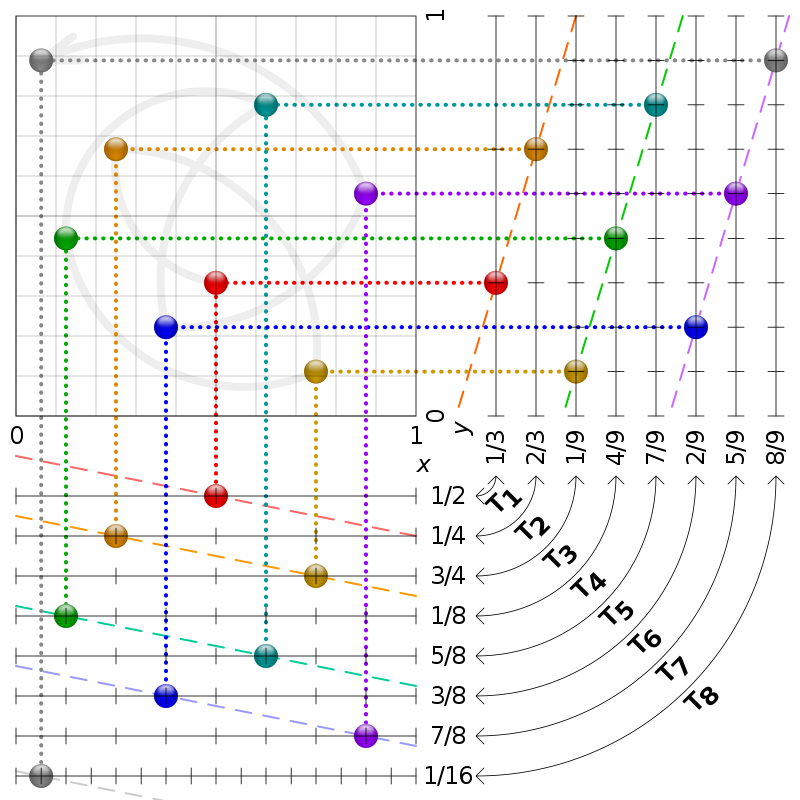
(source: wikipage)
</div>




Let's see the 3-D case.

In [ ]:
# change `mybegin` to show that any subset is equdistant

@manipulate for mylength=1:2000, angle1=45:90, angle2=45:90, mybegin=1:500
    x1 = Halton(2, length=mylength)[mybegin:end]
    y1 = Halton(3, length=mylength)[mybegin:end]
    z1 = Halton(5, length=mylength)[mybegin:end]
    # gh1 = plot(x1, y1, z1, seriestype=:scatter, markersize=4, camera=(angle1, angle2))
    scatter(x1, y1, z1, markersize=4, camera=(angle1, angle2))
end    

In [ ]:
# Does Halton sequence really produce a more evenly spaced sampling point?
# Also show that the first few Halton points may be correlated, so need to get rid of some.

# show the correlation from prime1=7,prime2=11 
# show the correlation reduced by prime1=2,prime2=11
# show odd behavior if prime2=47
# show better performance of generalzied Halton

using Random, Plots, RCall

prime1, prime2 = 2, 11   # (2,3) looks ok, (7,11) looks bad, (2,11) looks ok. Lesson: for high dimensions, not good, even if cutting off the first few obs there is still strong corr
mylength = 500
    
Random.seed!(1234)  
   # random; pre-generate long sequences
a1 = rand(500)
b1 = rand(500)      

   # Halton
a2 = Halton(prime1, length=500)
b2 = Halton(prime2, length=500)

   # generalized Halton
reval("suppressMessages(suppressWarnings(library(qrng)))")  # load `qrng` package in R
ab3 = rcopy(R"set.seed(271); ghalton(n=$(mylength), d=5, method=c(\"generalized\") )")[:,4:5]  # get dim=5 and keep only dim=4,5


@manipulate for mybeg=1:mylength, myend=2:mylength    # choose the length of the sequence
    ph1 = scatter(a1[mybeg:myend], b1[mybeg:myend], label="Random")
    ph2 = scatter(a2[mybeg:myend], b2[mybeg:myend], label="Halton")    
    ph3 = scatter(ab3[mybeg:myend, 1], ab3[mybeg:myend, 2], label="gHalton" )
    plot(ph1, ph2, ph3)
end    


## Homework: Instead of using `rand`, use grids instead. Try your best to have a "nice" coverage.


###  Homework 2
####  Let's redo the integration problem using Halton sequence:
  $$\begin{aligned}
   I = \int_{-\infty}^\infty \exp\left(-\frac{1}{3}x^2\right)\sqrt{1+x^2} dx.
  \end{aligned}$$ 
- Use Monte Carlo integration (via LDS) to compute the following integration.
  - transform the infinite domain to $[0,1]$; mind the Jacobian;
  - draw Halton sequence from $[0,1]$;
  - compute the integration with a given $n$.
- Inspect the convergence path by computing $I$ using different $n$, and draw a graph with $n$ and $I$ on the horizontal and vertical axes, respectively.

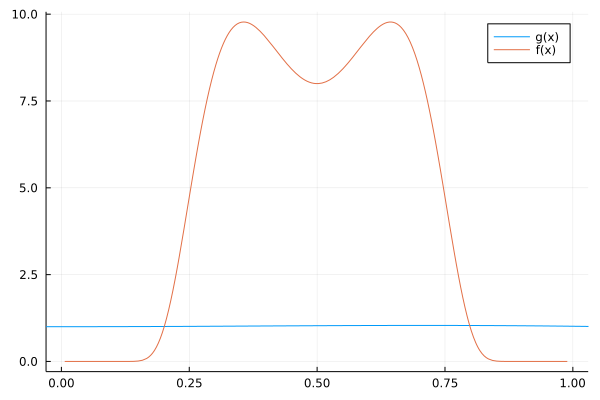

In [4]:
# Solution to HW2
using Plots
function domain_trans(g::Function)
    x(t) = (2t-1) / (t-t^2)
    jcb(t) = (2t^2-2t+1) / (t^2-t)^2
    return f(t) = g(x(t)) * jcb(t)
end

g(x) = exp(-x^2/3) * sqrt(1+x^2)
f = domain_trans(g)
plot(g, label="g(x)")
plot!(f, xlim=[0, 1], label="f(x)")

In [5]:
function quaMCM(f::Function)
    n = 2^20-1  # close to 1e6
    quaMCM_res = zeros(n)
    for i = 1:n
       quaMCM_res[i] = sum(f.(Halton(2, length=i))) / i
    end
    
    return quaMCM_res
end


quaMCM_res = quaMCM(f)
@show quaMCM_res[end]
plot(1:2^20, qua_MCM, label="")

In [ ]:
using Distributions, HaltonSequences

g(x) = exp((-1/3) * (x^2)) * sqrt(1+x^2)
x(t) = (2*t-1) / (t-t^2)                          # variable transformation
J(t) = (2*(t^2)-2*t+1) / ((t^2-t)^2)              # Jacobian
f(t) = g(x(t))*J(t)

every = 50
n_end = 20000

n_start = every
res_Halton = zeros(Int((n_end-n_start)/every) + 1)

hpt = Halton(2, length=n_end)

for n in n_start:every:n_end                   
    res = sum( f.(hpt[1:n]) ) / n
    res_Halton[Int((n-n_start)/every) + 1] = res
end


n = [n_start:every:n_end;]
plot(n, res_Halton, ylimit=[4.4, 4.8], label="approx. =$(res_Halton[end])") 
hline!([4.5638130028798430179261736288958], label="  true =4.563813002879843") |> display

allgrids = Int(n_end/every)

@manipulate for grid in 1:allgrids 
    n1   = n[1:grid]  # the max of grid is allgrids
    res1 = res_Halton[1:grid]
    plot(n1, res1, ylimit=[4.4, 4.8], label="approx. =$(res1[end])")
    hline!([4.5638130028798430179261736288958], label="  true =4.563813002879843") 
end